This is a study of data of emergency (911) calls in Montegomery County Pennsylvania, USA [[source](https://www.kaggle.com/datasets/mchirico/montcoalert/data)].
The data consists of the following information:
- title: Call title listing calls category and subcategory
- desc: Description of calls
- timeStamp: Calls time in 'Year-Month-Day hr:min:sec' format
- twp: Township of calls
- zip: ZIP code of calls
- lat: Lattitude position of calls
- lng: Longitude position of calls
- addr: Address of calls
- e: Redundant variable with always eual to 1

Seaborn library has been used for visual exploration of data study.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 

data = pd.read_csv('/Users/siddhesh/Work/datasets/Emergency911Calls/911_original.csv')
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [3]:
data.describe()

,lat,lng,zip,e
count,663522.000000,663522.000000,583323.000000,663522.0
mean,40.158162,-75.300105,19236.055791,1.0
std,0.220641,1.672884,298.222637,0.0
min,0.000000,-119.698206,1104.000000,1.0
25%,40.100344,-75.392735,19038.000000,1.0
50%,40.143927,-75.305143,19401.000000,1.0
75%,40.229008,-75.211865,19446.000000,1.0
max,51.335390,87.854975,77316.000000,1.0


Check for duplicate information, and clean it if any.

In [4]:
print(f"Number of duplicate rows: {data.duplicated().sum()}. Drop duplicates.")
data.drop_duplicates(inplace=True)

Number of duplicate rows: 240. Drop duplicates.


Check for NaN values. \
Column 'zip' and 'twp' contains 80199 and 293 NaN values resepctively. \
NaN value fraction is mainly in one column ('zip') with 12%. So ignore those NaN values in this study.

In [5]:
data.isna().sum()

lat              0
lng              0
desc             0
zip          80165
title            0
timeStamp        0
twp            293
addr             0
e                0
dtype: int64

In [6]:
80199/663282

0.12091237211321881

In [7]:
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1


Datatype of 'timeStamp' coulmn is string. Converting it to 'datatime' format would help us accessing date easily for our study.

In [8]:
print(f"Datatype of 'timeStamp column: {type(data['timeStamp'].loc[0]) = } {data['timeStamp'].loc[0] = }")
data['timeStamp'] = pd.to_datetime(data['timeStamp'])
#data.info()

Datatype of 'timeStamp column: type(data['timeStamp'].loc[0]) = <class 'str'> data['timeStamp'].loc[0] = '2015-12-10 17:10:52'


Separate 'timeStamp' information into 'Year', 'Month', 'Day' and 'Hour' columns.

In [9]:
data['Year'] = data['timeStamp'].dt.year
data['Month'] = data['timeStamp'].dt.month
data['Day'] = data['timeStamp'].dt.day
data['Hour'] = data['timeStamp'].dt.hour
data['DayOfWeek'] = data['timeStamp'].dt.day_of_week
data['DayOfWeekMpd'] = data['DayOfWeek'].map({0:'Sunday', 1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
data

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,DayOfWeek,DayOfWeekMpd
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,17,3,Wednesday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,17,3,Wednesday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015,12,10,14,3,Wednesday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,16,3,Wednesday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,16,3,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,2020,7,29,15,2,Tuesday
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,2020,7,29,15,2,Tuesday
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,2020,7,29,15,2,Tuesday
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,2020,7,29,15,2,Tuesday


Information in 'title' coulmn is stored in 'Category : subcategory' format. Add separate columns for 'Category' and 'Subcategory'.

In [10]:
print(f"Check first few row of 'title' column to understand its format: {data['title'].loc[0:10] = }")
data['Category'] = data['title'].str.split(":").str.get(0)
data['Subcategory'] = data['title'].str.split(":").str.get(1)
data['Subcategory'] = data['Subcategory'].str.replace('-', '') # drop proceeding '-'
data

Check first few row of 'title' column to understand its format: data['title'].loc[0:10] = 0          EMS: BACK PAINS/INJURY
1         EMS: DIABETIC EMERGENCY
2             Fire: GAS-ODOR/LEAK
3          EMS: CARDIAC EMERGENCY
4                  EMS: DIZZINESS
5                EMS: HEAD INJURY
6            EMS: NAUSEA/VOMITING
7      EMS: RESPIRATORY EMERGENCY
8           EMS: SYNCOPAL EPISODE
9     Traffic: VEHICLE ACCIDENT -
10    Traffic: VEHICLE ACCIDENT -
Name: title, dtype: object


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Year,Month,Day,Hour,DayOfWeek,DayOfWeekMpd,Category,Subcategory
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,10,17,3,Wednesday,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,10,17,3,Wednesday,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015,12,10,14,3,Wednesday,Fire,GASODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,10,16,3,Wednesday,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,10,16,3,Wednesday,EMS,DIZZINESS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,2020,7,29,15,2,Tuesday,Traffic,VEHICLE ACCIDENT
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,2020,7,29,15,2,Tuesday,EMS,GENERAL WEAKNESS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,2020,7,29,15,2,Tuesday,EMS,VEHICLE ACCIDENT
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,2020,7,29,15,2,Tuesday,Fire,BUILDING FIRE


Counte categories and subcategories.

<Axes: xlabel='Category', ylabel='count'>

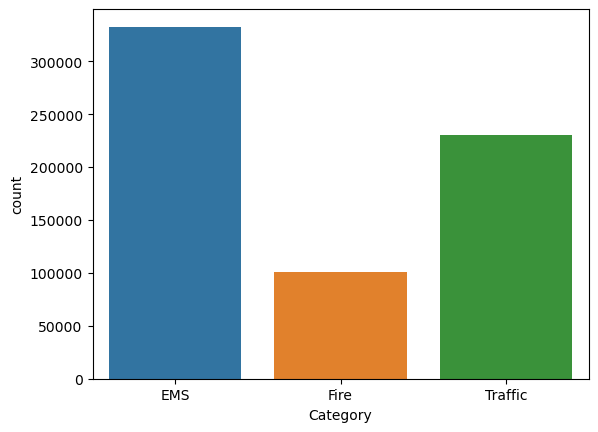

In [11]:
sns.countplot(data=data, x='Category')

<Axes: xlabel='count', ylabel='Subcategory'>

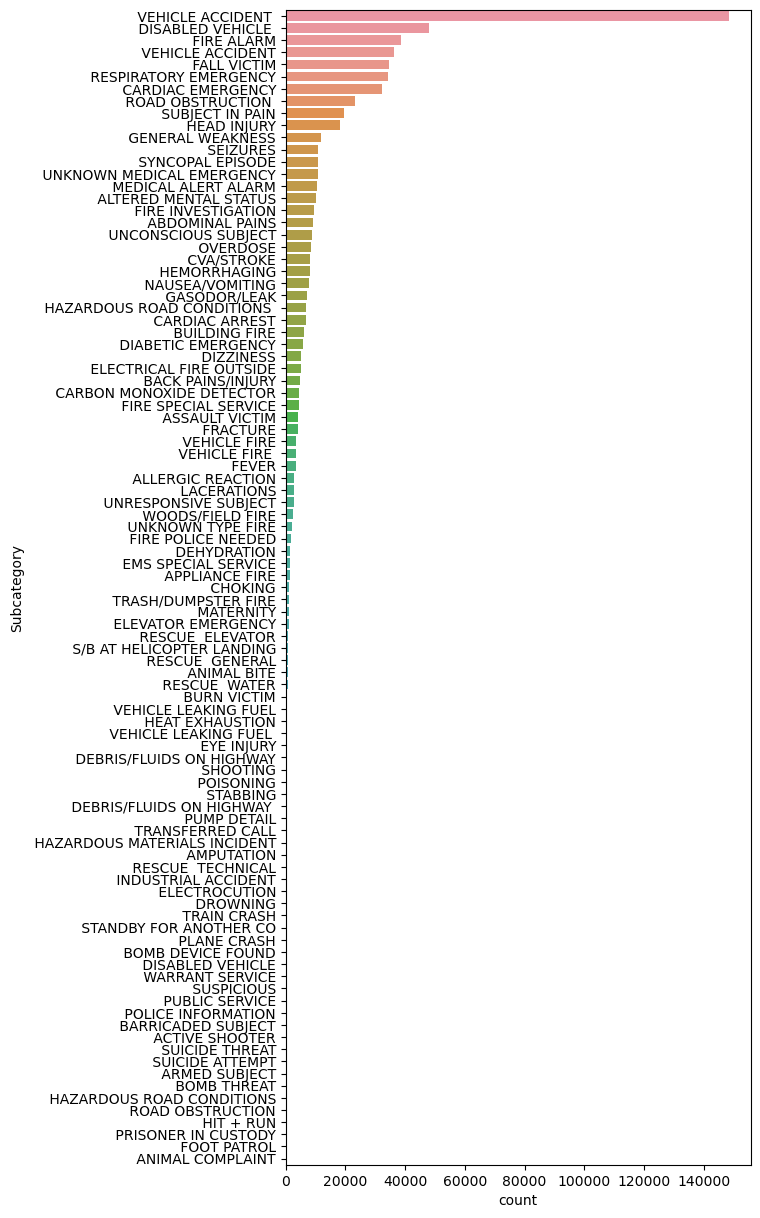

In [12]:
fig, ax = plt.subplots(figsize=(6,15))
sns.countplot(data=data, y='Subcategory', order=data['Subcategory'].value_counts().index, ax=ax)

Number of calls over the years

<Axes: xlabel='Year', ylabel='count'>

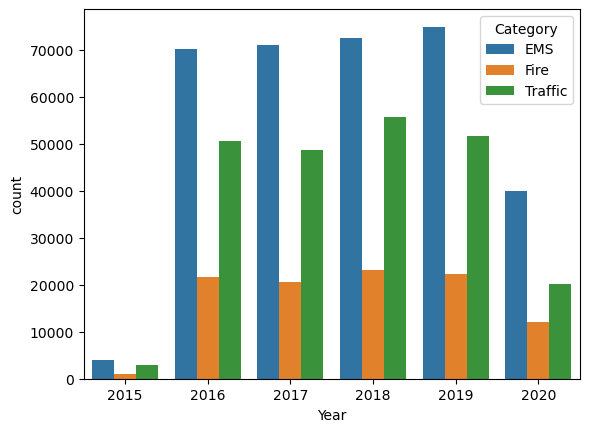

In [13]:
sns.countplot(data=data, x='Year', hue='Category')

Number of calls over the months of years.

<Axes: xlabel='Month', ylabel='count'>

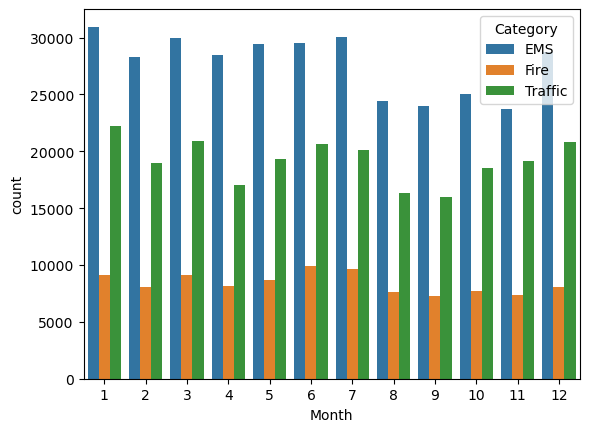

In [14]:
sns.countplot(data=data, x='Month', hue='Category')

Number of calls over days of months.

<Axes: xlabel='Day', ylabel='count'>

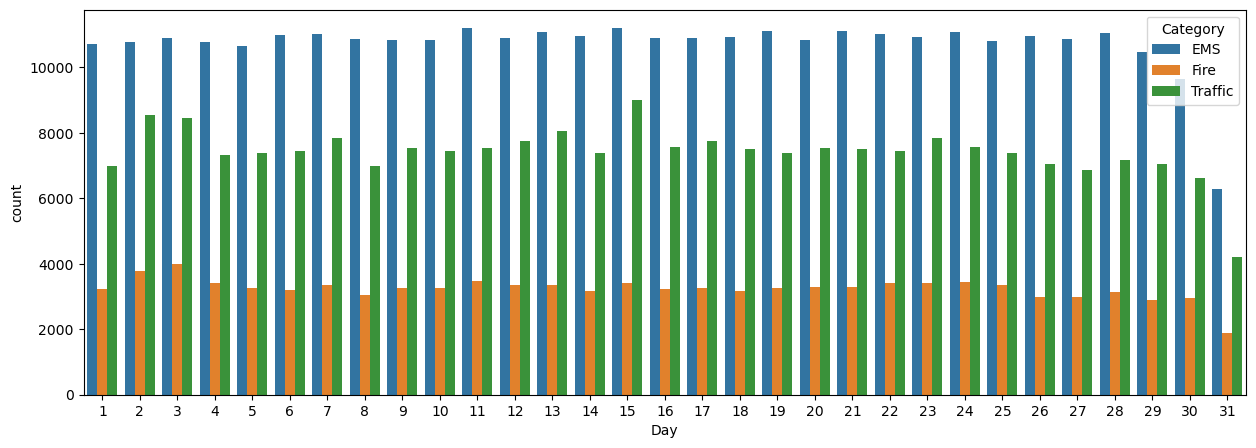

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(data=data, x='Day', hue='Category', ax=ax)

Number of calls over day of weeks.

>> Trafic calls on Saturdays are 30% lower than usual other days.

In [16]:
data.value_counts('DayOfWeekMpd').reset_index()

,DayOfWeekMpd,count
0,Thursday,102902
1,Tuesday,99126
2,Wednesday,98637
3,Monday,97651
4,Sunday,96722
5,Friday,89414
6,Saturday,78830


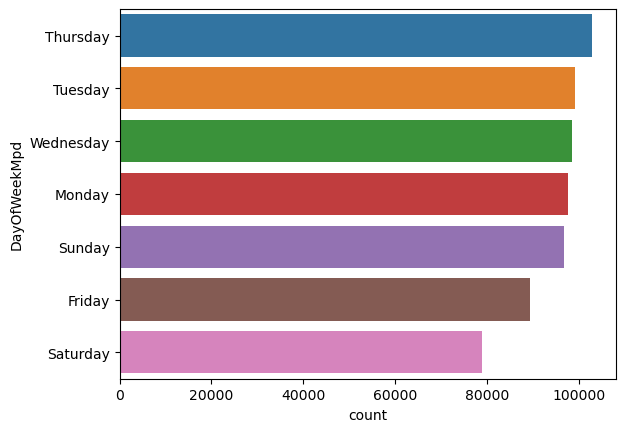

In [17]:
fig = sns.barplot(data=data.value_counts('DayOfWeekMpd').reset_index(), x='count', y='DayOfWeekMpd')
#fig.legend(loc='center right', bbox_to_anchor=(1.25,0.5))

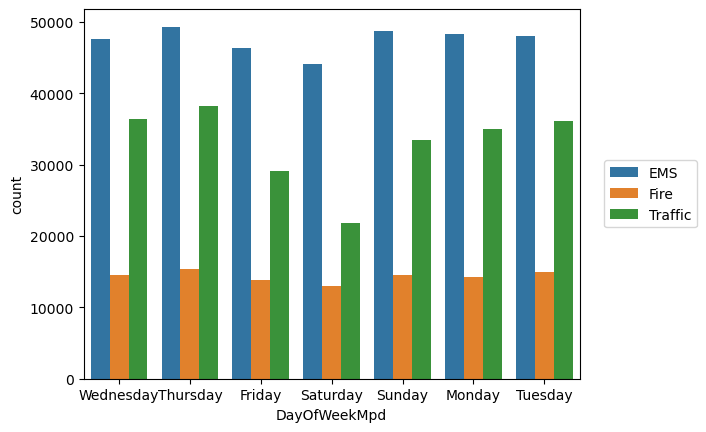

In [18]:
fig = sns.countplot(data=data, x='DayOfWeekMpd', hue='Category')
fig.legend(loc='center right', bbox_to_anchor=(1.25,0.5))

Number of calls per hour.
>> Probability of calls in day time from 7am to 7pm is higher than night time.

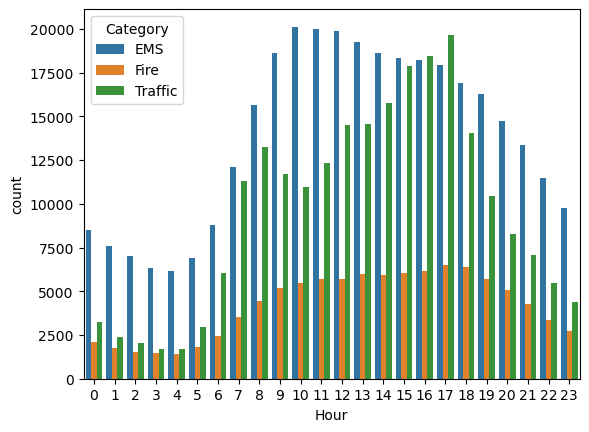

In [19]:
fig = sns.countplot(data=data, x='Hour', hue='Category')

Number of call in week-day vs hours correlation.

<Axes: xlabel='Hour', ylabel='DayOfWeekMpd'>

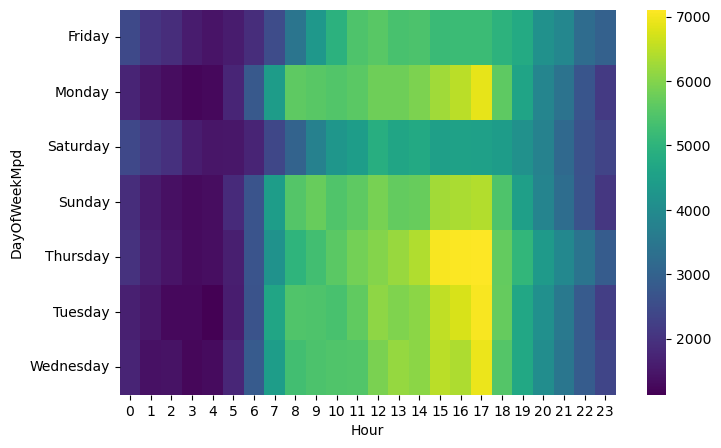

In [20]:
databyDayHour = data.groupby(['DayOfWeekMpd', 'Hour']).count()['title'].unstack()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data=databyDayHour, ax=ax, cmap=mpl.cm.viridis)

Correlations in days and hours of calls.
>> Call probability is higher on working days between 15-17 hours.

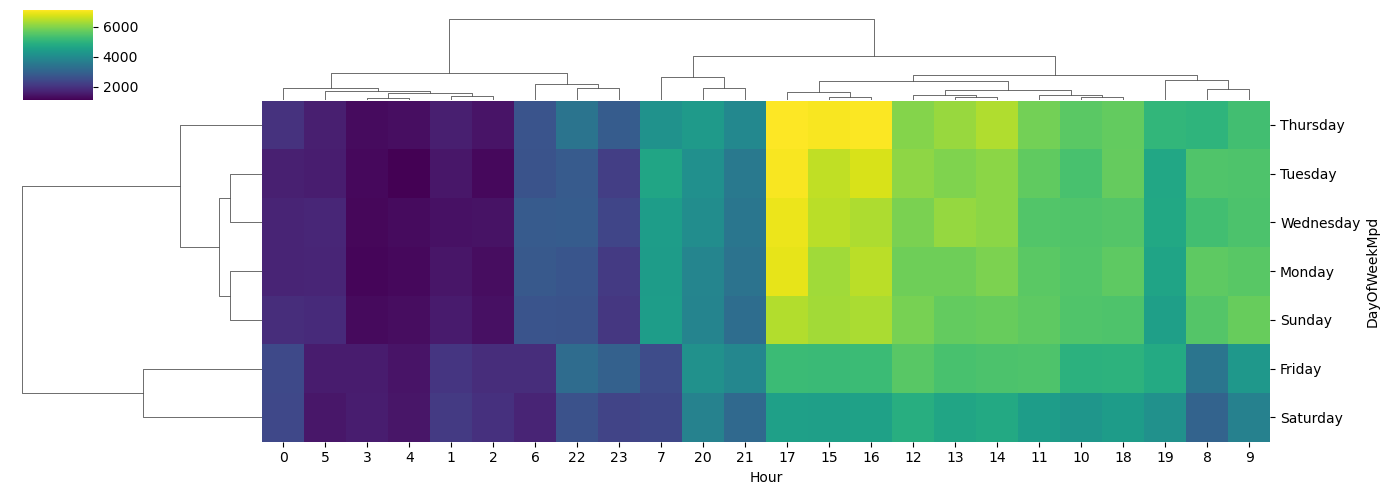

In [21]:
sns.clustermap(data=databyDayHour, figsize=(14,5), cmap=mpl.cm.viridis)

Number of call in week-day vs months correlation.

<Axes: xlabel='Month', ylabel='DayOfWeekMpd'>

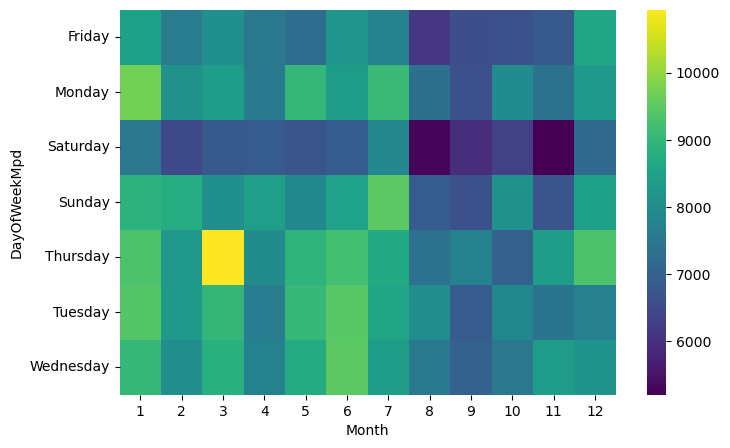

In [22]:
databyDayMonth = data.groupby(['DayOfWeekMpd', 'Month']).count()['title'].unstack()
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(data=databyDayMonth, ax=ax, cmap=mpl.cm.viridis)

Correlations in days and month of calls.
>> Call probability is higher on working days between 15-17 hours.

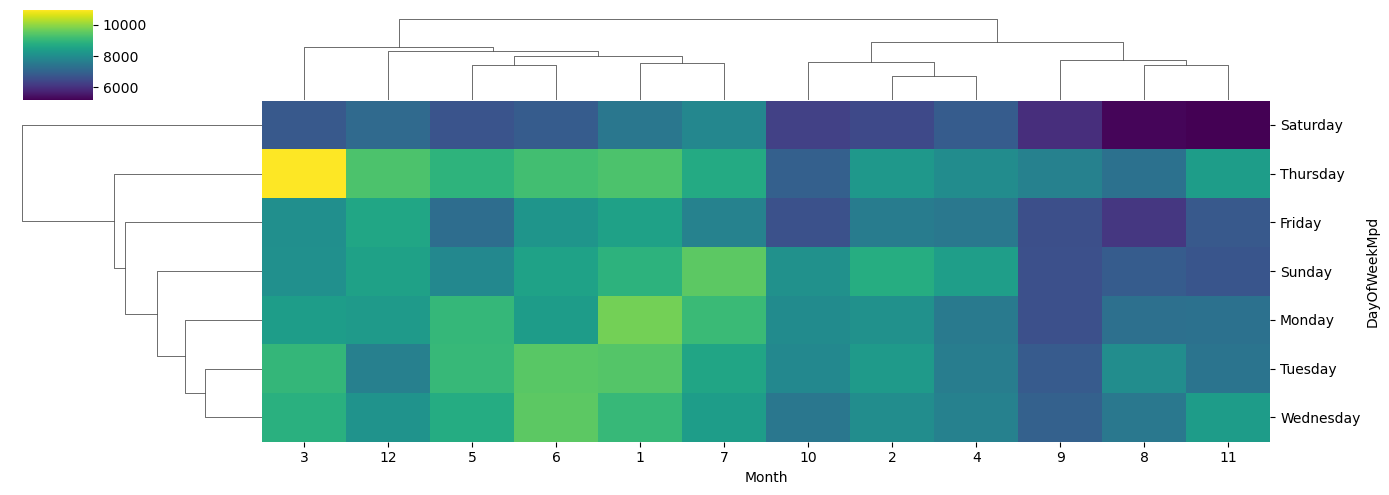

In [23]:
sns.clustermap(data=databyDayMonth, figsize=(14,5), cmap=mpl.cm.viridis)

Number of call in hour vs months correlation.

<Axes: xlabel='Month', ylabel='Hour'>

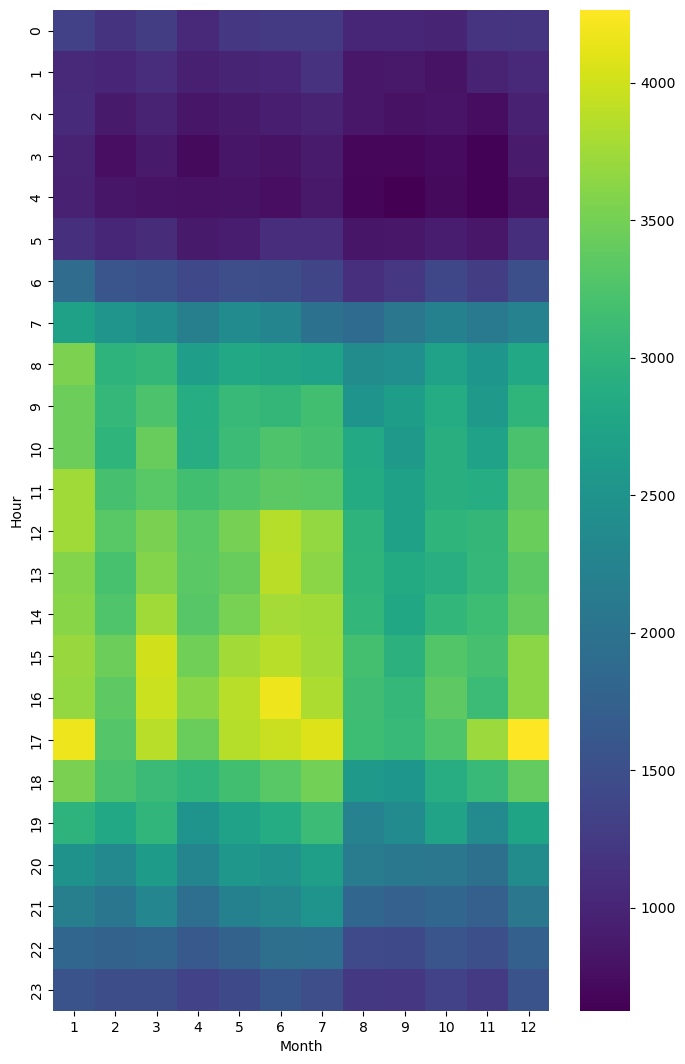

In [24]:
databyHourMonth = data.groupby(['Hour', 'Month']).count()['title'].unstack()
fig, ax = plt.subplots(figsize=(8,13))
sns.heatmap(data=databyHourMonth, ax=ax, cmap=mpl.cm.viridis)

Correlations in hour and month of calls.

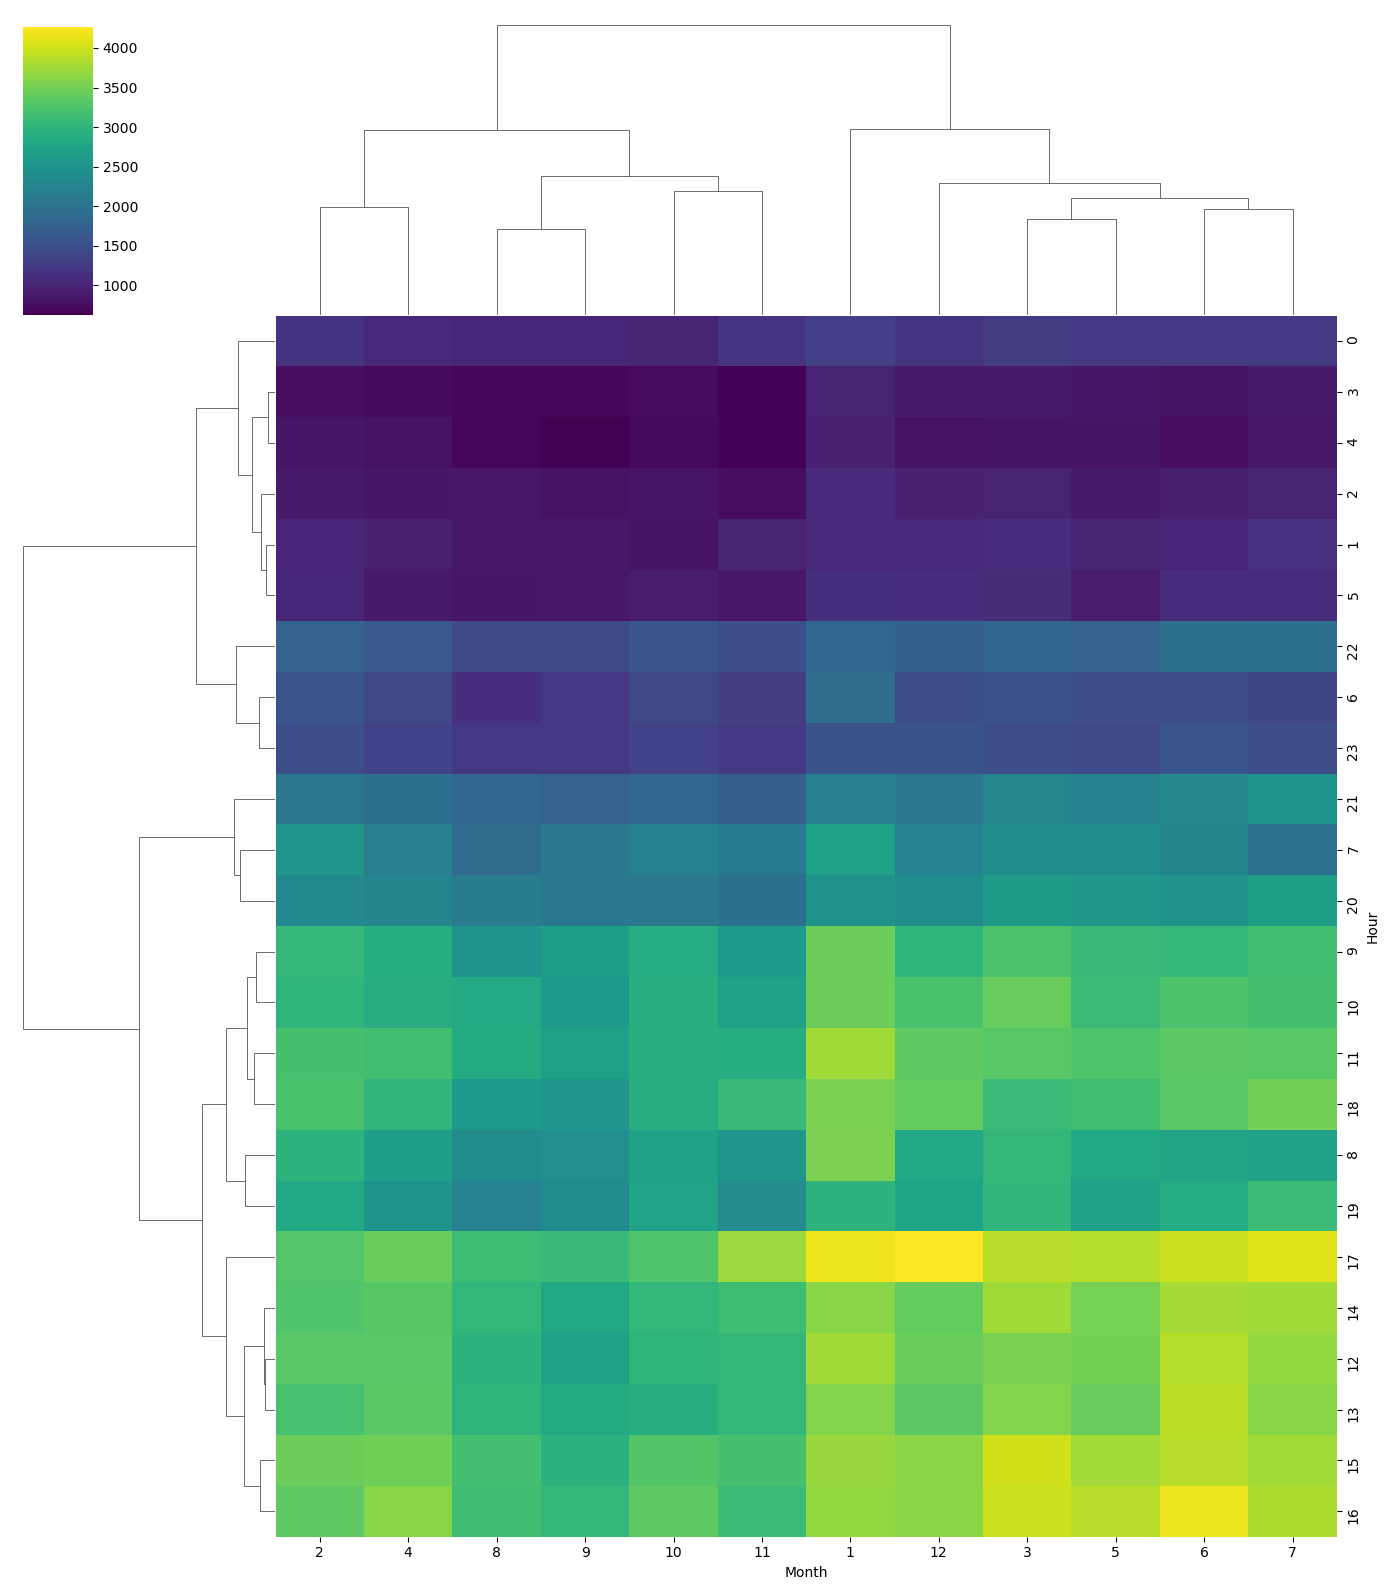

In [25]:
sns.clustermap(data=databyHourMonth, figsize=(14,16), cmap=mpl.cm.viridis)

Call in years vs months

dataByYearMonth = Month       1        2        3        4        5        6        7        8   \
Year                                                                            
2015       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2016   13094.0  11396.0  11054.0  11286.0  11361.0  11728.0  12088.0  11903.0   
2017   11605.0  10267.0  11684.0  11055.0  11717.0  12332.0  11767.0  11752.0   
2018   13123.0  11164.0  14922.0  11240.0  12550.0  12106.0  12548.0  12314.0   
2019   12298.0  11556.0  12435.0  11738.0  12819.0  12316.0  13161.0  12386.0   
2020   12192.0  11040.0   9920.0   8241.0   9041.0  11538.0  10259.0      NaN   

Month       9        10       11       12  
Year                                       
2015       NaN      NaN      NaN   7905.0  
2016   11669.0  12502.0  12091.0  12162.0  
2017   11316.0  12337.0  11547.0  12940.0  
2018   12336.0  12975.0  14093.0  12144.0  
2019   11873.0  13425.0  12445.0  12526.0  
2020       NaN      NaN  

<Axes: xlabel='Month', ylabel='Year'>

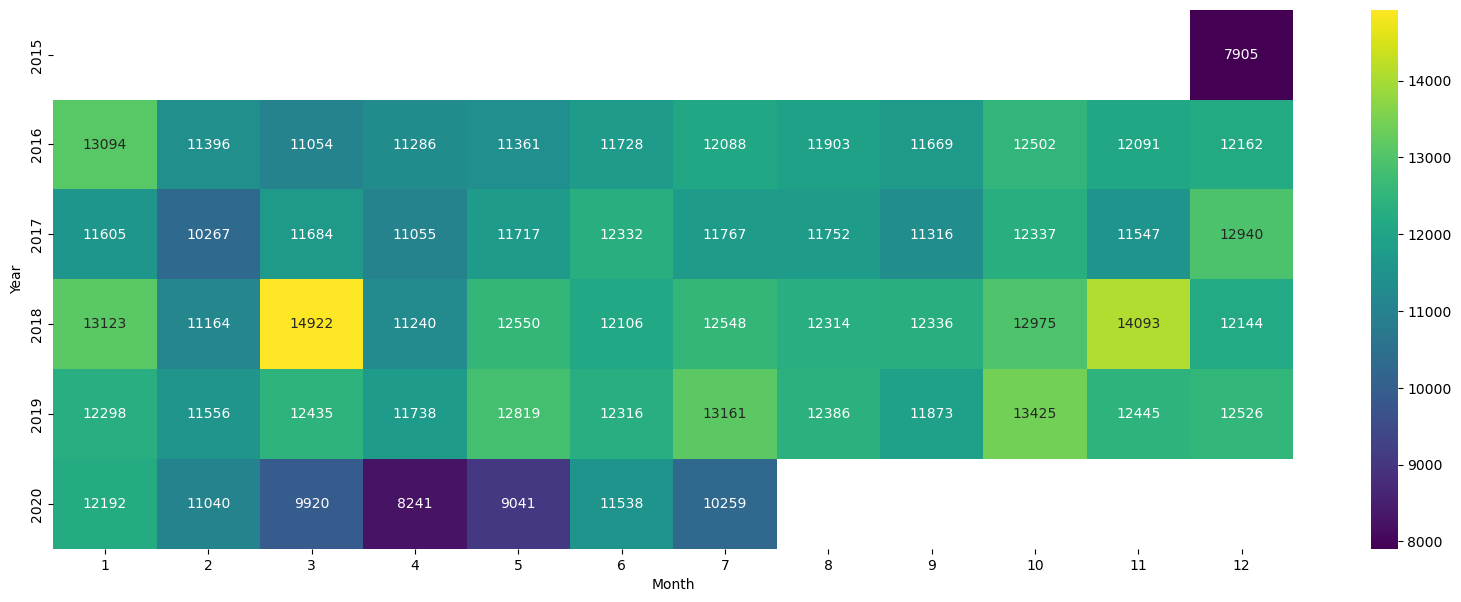

In [26]:
dataByYearMonth = data.groupby(['Year', 'Month']).count()['title'].unstack()
print(f"{dataByYearMonth = }")
fig, ax = plt.subplots(figsize=(20,7))
sns.heatmap(data=dataByYearMonth, ax=ax, cmap=mpl.cm.viridis, annot=True, fmt='.0f')

Top 5 twonship from where call were received.

In [27]:
data['twp'].value_counts().nlargest(5)

twp
LOWER MERION    55470
ABINGTON        39927
NORRISTOWN      37616
UPPER MERION    35990
CHELTENHAM      30554
Name: count, dtype: int64

In [28]:
data.groupby(['Category', 'twp']).count()

lat    lng   desc    zip  title  timeStamp   addr  \
Category twp                                                                    
EMS      ABINGTON         20603  20603  20603  19517  20603      20603  20603   
         AMBLER            2631   2631   2631   2589   2631       2631   2631   
         BERKS COUNTY      1841   1841   1841   1269   1841       1841   1841   
         BRIDGEPORT        2011   2011   2011   1650   2011       2011   2011   
         BRYN ATHYN         477    477    477    437    477        477    477   
...                         ...    ...    ...    ...    ...        ...    ...   
Traffic  WEST NORRITON     3441   3441   3441   3050   3441       3441   3441   
         WEST POTTSGROVE    983    983    983    847    983        983    983   
         WHITEMARSH        7445   7445   7445   6075   7445       7445   7445   
         WHITPAIN          4832   4832   4832   4433   4832       4832   4832   
         WORCESTER         2133   2133   2133   2115   2133       2133   2133   

                              e   Year  Month    Day   Hour  DayOfWeek  \
Category twp                                                             
EMS      ABINGTON         20603  20603  20603  20603  20603      20603   
         AMBLER            2631   2631   2631   2631   2631       2631   
         BERKS COUNTY      1841   1841   1841   1841   1841       1841   
         BRIDGEPORT        2011   2011   2011   2011   2011       2011   
         BRYN ATHYN         477    477    477    477    477        477   
...                         ...    ...    ...    ...    ...        ...   
Traffic  WEST NORRITON     3441   3441   3441   3441   3441       3441   
         WEST POTTSGROVE    983    983    983    983    983        983   
         WHITEMARSH        7445   7445   7445   7445   7445       7445   
         WHITPAIN          4832   4832   4832   4832   4832       4832   
         WORCESTER         2133   2133   2133   2133   2133       2133   

                          DayOfWeekMpd  Subcategory  
Category twp                                         
EMS      ABINGTON                20603        20603  
         AMBLER                   2631         2631  
         BERKS COUNTY             1841         1841  
         BRIDGEPORT               2011         2011  
         BRYN ATHYN                477          477  
...                                ...          ...  
Traffic  WEST NORRITON            3441         3441  
         WEST POTTSGROVE           983          983  
         WHITEMARSH               7445         7445  
         WHITPAIN                 4832         4832  
         WORCESTER                2133         2133  

[204 rows x 15 columns]

Top 5 twonship per category from where call were received.

In [29]:
data.groupby(['Category'])['twp'].apply(lambda x: x.value_counts().head(5))

Category                  
EMS       NORRISTOWN          24760
          LOWER MERION        21571
          ABINGTON            20603
          POTTSTOWN           17423
          LOWER PROVIDENCE    14744
Fire      LOWER MERION        10149
          ABINGTON             6457
          NORRISTOWN           5246
          CHELTENHAM           4794
          UPPER MERION         4772
Traffic   LOWER MERION        23750
          UPPER MERION        17118
          ABINGTON            12867
          CHELTENHAM          11417
          PLYMOUTH             9313
Name: twp, dtype: int64

Top 5 ZIP per category from where call were received.

In [30]:
data.groupby(['Category'])['zip'].apply(lambda x: x.value_counts().head(5))

Category         
EMS       19401.0    29584
          19464.0    25987
          19403.0    22400
          19446.0    18316
          19406.0    11776
Fire      19464.0     7475
          19401.0     6106
          19446.0     4095
          19406.0     3609
          19403.0     3592
Traffic   19464.0    10438
          19401.0     9893
          19446.0     9846
          19403.0     8882
          19002.0     7873
Name: zip, dtype: int64